## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ —Ä–∞–∑–º–µ—á–µ–Ω–Ω–æ–º –≤—Ä—É—á–Ω—É—é –¥–∞—Ç–∞—Å–µ—Ç–µ.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from string import digits
import re
from nltk.stem.snowball import RussianStemmer
from nltk.corpus import stopwords
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pymorphy2
morph_analyzer = pymorphy2.MorphAnalyzer()
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix

–ó–∞–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º —Å—Ç–æ–ø-—Å–ª–æ–≤–∞

In [3]:
stop_words = stopwords.words('russian')
stop_words.extend(['—ç—Ç–æ', '‚Äì', '-', '—Ñ–æ–Ω–¥', '–Ω–∞—à', '–ø–æ–º–æ—â—å', '–ø–æ–º–æ–≥–∞—Ç—å',
                   '–ø–æ–º–æ—á—å', '–ø–æ–¥–¥–µ—Ä–∂–∞—Ç—å', '–ø–æ–¥–¥–µ—Ä–∂–∫–∞', '—Å—Ä–µ–¥—Å—Ç–≤–æ', '–∫–æ—Ç–æ—Ä—ã–π', '–≤–µ—Å—å',
                   '–±–ª–∞–≥–æ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π', '–¥–µ–Ω—å–≥–∏', '—Ä—É–±–ª—å', '–≥–æ–¥', '–¥–µ–Ω—å', '—Ç—ã—Å—è—á–∞',
                   '–≤–∞—à', '—Å–µ–≥–æ–¥–Ω—è', '–∑–∞–≤—Ç—Ä–∞', '—ç—Ç–æ—Ç', '–¥–∞—Ç—å', '–ø—Ä–æ–µ–∫—Ç', '—Å–≤–æ–π' ])

–î–æ—Å—Ç–∞–µ–º –¥–∞–Ω–Ω—ã–µ

In [4]:
df = pd.read_csv("/Users/liza/PycharmProjects/Planeta_project/plset_fin_upd_clustered.tsv", sep ="\t")
df = df.drop(df.columns[0:2], axis=1)
df = df.rename_axis(None, axis=1).rename_axis('Id', axis=1)

–≠—Ç–æ —Ç–µ–∫—Å—Ç—ã –∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –±–ª–∞–≥–æ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–±–æ—Ä–æ–≤ –Ω–∞ –∫—Ä–∞—É–¥—Ñ–∞–Ω–¥–∏–Ω–≥–æ–≤–æ–π –ø–ª–æ—â–∞–¥–∫–µ planeta.ru
–≠—Ç–æ 2038 —Ç–µ–∫—Å—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–º –ø—Ä–∏—Å–≤–æ–µ–Ω—ã –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: —á–∞—Å—Ç–∏—á–Ω–æ —Å –ø–æ–º–æ—â—å—é –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∏ —á–∞—Å—Ç–∏—á–Ω–æ –≤—Ä—É—á–Ω—É—é.
–í —ç—Ç–æ–π —Ç–µ—Ç—Ä–∞–¥–∫–µ –º—ã –±—É–¥–µ–º —É—á–∏—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º.

In [5]:
df.head()
set(df.Category)

{'–∞–∫—Ç–∏–≤–∏–∑–º_–ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ_–ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞',
 '–±–µ–∑–¥–æ–º–Ω—ã–µ_–∫—Ä–∏–∑–∏—Å',
 '–≤–∑—Ä–æ—Å–ª—ã–µ_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è',
 '–¥–µ—Ç–∏_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è',
 '–∂–∏–≤–æ—Ç–Ω—ã–µ',
 '–∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ',
 '–º–∞–ª–æ–∏–º—É—â–∏–µ_–±–µ–¥–Ω–æ—Å—Ç—å',
 '–º–µ—á—Ç—ã_–ø–æ–¥–∞—Ä–∫–∏_–ø—Ä–∞–∑–¥–Ω–∏–∫–∏',
 '–Ω–∞—É–∫–∞_–∏—Å—Ç–æ—Ä–∏—è_–∫—É–ª—å—Ç—É—Ä–∞',
 '–ø–∞–ª–ª–∏–∞—Ç–∏–≤_—É—Ö–æ–¥',
 '–ø–æ–∂–∏–ª—ã–µ_–≤–µ—Ç–µ—Ä–∞–Ω—ã',
 '—Ä–∞–∑–≤–∏—Ç–∏–µ_–Ω–∫–æ_–∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞',
 '—Å–µ–º–µ–π–Ω—ã–π_–∫—Ä–∏–∑–∏—Å',
 '—Å–∏—Ä–æ—Ç—ã_–¥–µ—Ç–∏_–∏–∑_–Ω–µ–±–ª–∞–≥–æ–ø–æ–ª—É—á–Ω—ã—Ö —Å–µ–º–µ–π',
 '—Å–æ—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è_–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏',
 '—ç–∫–æ–ª–æ–≥–∏—è'}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

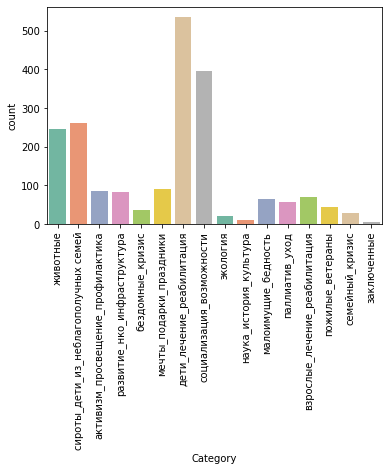

In [6]:
sns.countplot(x=df['Category'], data=df, palette="Set2")
plt.xticks(rotation = '90')

–§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤ —Å –≤–∞—Ä–∏–∞–Ω—Ç–∞–º–∏: —Å–ª–æ–≤–∞, –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è –∏–ª–∏ —Å—Ç–µ–º–º–∏–Ω–≥. 

- –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å–∏–ª—å–Ω–æ —É–ª—É—á—à–∞–µ—Ç MultinomailNB, –Ω–æ –æ–Ω –≤—Å–µ —Ä–∞–≤–Ω–æ –≤ –∏—Ç–æ–≥–µ —É—Å—Ç—É–ø–∞–µ—Ç LR (–∑–∞—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ).
- –†–µ–≥—Ä–µ—Å—Å–∏—é –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è –∏ —Å—Ç–µ–º–º–∏–Ω–≥ —á—É—Ç—å-—á—É—Ç—å —É–ª—É—á–∞—à—é—Ç (—Ö–æ—Ç—è –º–æ–≥—É—Ç –∏ —É—Ö—É–¥—à–∞—Ç—å –ø—Ä–∏ –¥—Ä—É–≥–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö). –£–¥–ª–∏–Ω—è—é—Ç –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã –≤–µ–∫—Ç–æ—Ä–∞–π–∑–µ—Ä–∞. 

–û—Å—Ç–∞–≤–ª—è—é –ª–µ–º–º—ã, —Ç.–∫. –≤—Å–µ-—Ç–∞–∫–∏ —É–ª—É—á—à–µ–Ω–∏–µ –µ—Å—Ç—å –∏ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –±–æ–ª–µ–µ –≤–Ω—è—Ç–Ω—ã–π –≤—ã–≤–æ–¥ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤. 

In [7]:
def prep(text):
    clean_text = text.translate(str.maketrans('', '', '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~¬´¬ª‚Ññ!‚Äî'))
    clean_text = clean_text.translate(str.maketrans('', '', digits))
    clean_text = re.sub("-", " ", clean_text)
    #clean_text = re.sub("[a-zA-Z]", "", clean_text)  # –∏—Å–∫–ª—é—á–∞–µ–º —Å–ª–æ–≤–∞ –ª–∞—Ç–∏–Ω–∏—Ü–µ–π
    clean_text = clean_text.lower()
    clean_text = clean_text.split()
    
    #words = [word for word in clean_text if word not in stop_words]
    #return words
    
    lemmas = [morph_analyzer.parse(word)[0].normal_form for word in clean_text]
    lemmas = [word for word in lemmas if word not in stop_words]
    return lemmas
    
    #–Ω–∏–∂–µ - –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ –ª–µ–º–º–∞—Ç–∏—Ü–∞—Ü–∏–∏, –º–æ–∂–Ω–æ –∏—Ö –ø–µ—Ä–µ–∫–ª—é—á–∞—Ç—å (–∑–∞/—Ä–∞—Å–∫–æ–º–º–µ–Ω—á–∏–≤–∞—Ç—å)
    #stemmer = RussianStemmer()
    #stemmed_words = [stemmer.stem(word) for word in clean_text]
    #return stemmed_words

–í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤.

- CountVectorizer –Ω–∞ –≤—Å–µ—Ö –º–æ–¥–µ–ª—è—Ö –ø–æ–∫–∞–∑–∞–ª —Å–µ–±—è –ª—É—á—à–µ, —á–µ–º TfidfVectorizer, –ø–æ—ç—Ç–æ–º—É –æ—Å—Ç–∞–≤–ª—è—é –µ–≥–æ. 
- Word2vec –∏ —Å–æ–∫—Ä–∞—â–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –≤ —ç—Ç–æ—Ç —Ä–∞–∑ –Ω–µ —Å—Ç–∞–ª–∞ –ø—Ä–æ–±–æ–≤–∞—Ç—å, —Ç.–∫. –ø—Ä–∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –æ–Ω–∏ –Ω–µ —É–ª—É—á—à–∞–ª–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ó–¥–µ—Å—å —Ç–æ–∂–µ –±–æ–ª—å—à–æ–π –Ω–∞–¥–µ–∂–Ω—ã –Ω–∞ –Ω–∏—Ö –Ω–µ –±—ã–ª–æ. 
- –ë–∏–≥—Ä–∞–º–º—ã –Ω–µ —É–ª—É—á—à–∏–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é –Ω–∏ —Å CountV, –Ω–∏ c Tfidf, –ø–æ—ç—Ç–æ–º—É –æ—Å—Ç–∞–≤–ª—è—é —É–Ω–∏–≥—Ä–∞–º–º—ã –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é. 
- –£—Ç–æ—á–Ω–µ–Ω–∏–µ max_df = 0.50 0.30 –∏ min_df = 0.1 –æ—Ç –∑–∞–ø—É—Å–∫–∞ –∫ –∑–∞–ø—É—Å–∫—É –º–æ–≥—É—Ç —á—É—Ç—å-—á—É—Ç—å —É–ª—É—á—à–∞—Ç—å –∏–ª–∏ —É—Ö—É–¥—à–∞—Ç—å –≤—ã–¥–∞—á—É.

In [8]:
vec = CountVectorizer(tokenizer=prep) 
bag_of_words = vec.fit_transform(df.Description)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.Category, stratify = df.Category)

#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.'''

–ü–æ–ø—Ä–æ–±–æ–≤–∞–ª–∞ –º–æ–¥–µ–ª–∏:

LogisticRegression\n
MultinomialNB\n
TreeClassifier\n
RandomForestClassifier\n
KNeighborsClassifier\n
SVC\n

–≠—Ç–∏ –ø–æ–ø—ã—Ç–∫–∏ –µ—Å—Ç—å –Ω–∏–∂–µ, –≤ –ø–æ–¥–≤–∞–ª–µ —Ç–µ—Ç—Ä–∞–¥–∫–∏. –õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —É LR, –ø–æ—ç—Ç–æ–º—É –æ—Å—Ç–∞–≤–ª—è—é –µ–µ.

–ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è LR –±—ã–ª–∏ –ø–æ–¥–æ–±—Ä–∞–Ω—ã —á–µ—Ä–µ–∑ gridsearch. –ï–º—É –≤ —Å–ª–æ–≤–∞—Ä—å –±—ã–ª–∏ –ø–æ–¥–∞–Ω—ã –Ω–µ –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —Ç.–∫. —ç—Ç–æ –±—ã –∑–∞–Ω—è–ª–æ —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏. –ë—ã–ª–∏ –≤–∑—è—Ç—ã –≤—ã–±–æ—Ä–æ—á–Ω–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ. –°–∫—Ä–∏–ø—Ç - –≤ –ø–æ–¥–≤–∞–ª–µ —Ç–µ—Ç—Ä–∞–¥–∫–∏. –í –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å—Ä–∞–±–∞—Ç—ã–≤–∞—é—Ç –ø–æ-—Ä–∞–∑–Ω–æ–º—É: –≤ –ø—Ä–µ–¥–µ–ª—è—Ö +1:3% –æ–Ω–∏ —É–ª—É—á—à–∞—é—Ç –∏–ª–∏ —É—Ö—É–¥—à–∞—é—Ç –≤—ã–¥–∞—á—É.

In [9]:
lr = LogisticRegression(max_iter=5000) # –æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ: C=0.02, class_weight='balanced'
clf = lr.fit(X_train, y_train)

In [11]:
print(classification_report(y_test, clf.predict(X_test), zero_division=0))

                                      precision    recall  f1-score   support

   –∞–∫—Ç–∏–≤–∏–∑–º_–ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ_–ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞       0.60      0.43      0.50        21
                    –±–µ–∑–¥–æ–º–Ω—ã–µ_–∫—Ä–∏–∑–∏—Å       0.75      1.00      0.86         9
       –≤–∑—Ä–æ—Å–ª—ã–µ_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.50      0.33      0.40        18
           –¥–µ—Ç–∏_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.84      0.93      0.88       134
                            –∂–∏–≤–æ—Ç–Ω—ã–µ       0.97      0.98      0.98        61
                         –∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ       0.00      0.00      0.00         1
                 –º–∞–ª–æ–∏–º—É—â–∏–µ_–±–µ–¥–Ω–æ—Å—Ç—å       0.47      0.47      0.47        17
             –º–µ—á—Ç—ã_–ø–æ–¥–∞—Ä–∫–∏_–ø—Ä–∞–∑–¥–Ω–∏–∫–∏       0.67      0.61      0.64        23
              –Ω–∞—É–∫–∞_–∏—Å—Ç–æ—Ä–∏—è_–∫—É–ª—å—Ç—É—Ä–∞       0.00      0.00      0.00         3
                      –ø–∞–ª–ª–∏–∞—Ç–∏–≤_—É—Ö

In [17]:
vector = vec.transform(['''–í –º–∞—Ä—Ç–µ 2017 –≥–æ–¥–∞ —Å—Ç—É–¥–µ–Ω—Ç - –º–µ–¥–∏–∫ –ï–≤–≥–µ–Ω–∏–π –ö–æ—Å–æ–≤—Å–∫–∏—Ö –Ω–∞—á–∞–ª —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –æ–∫–∞–∑—ã–≤–∞—Ç—å –º–µ–¥–∏–∫–æ-–ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏—á–µ—Å–∫—É—é –ø–æ–º–æ—â—å –ª—é–¥—è–º –Ω–∞ —É–ª–∏—Ü–µ. –í—Å–∫–æ—Ä–µ –ø–æ—è–≤–∏–ª—Å—è –ø—Ä–æ–µ–∫—Ç "–î—Ä—É–≥–∞—è –º–µ–¥–∏—Ü–∏–Ω–∞".
–ï–∂–µ–Ω–µ–¥–µ–ª—å–Ω–æ –∞—Ä–µ–Ω–¥–æ–≤–∞–Ω–Ω—ã–π –º–∏–Ω–∏–≤–µ–Ω —Å –≤–æ–ª–æ–Ω—Ç–µ—Ä–∞–º–∏ –≤—ã–µ–∑–∂–∞–µ—Ç –Ω–∞ —Ç–µ–ø–ª–æ—Ç—Ä–∞—Å—Å—ã. –í –º–∞—à–∏–Ω–µ –º—ã –ø—Ä–æ–≤–æ–¥–∏–º –ø—Ä–∏–µ–º, –æ–∫–∞–∑—ã–≤–∞–µ–º –ø–æ–º–æ—â—å –≤ –≤–∏–¥–µ –ø—Ä–æ—Å—Ç—ã—Ö, –Ω–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –º–µ—Ä - –ø–µ—Ä–µ–≤—è–∑–æ–∫ —Ä–∞–Ω, –≤—ã–¥–∞—á–∏ –∂–∞—Ä–æ–ø–æ–Ω–∏–∂–∞—é—â–∏—Ö –∏ –æ–±–µ–∑–±–æ–ª–∏–≤–∞—é—â–∏—Ö –±–µ–∑—Ä–µ—Ü–µ–ø—Ç—É—Ä–Ω—ã—Ö –ª–µ–∫–∞—Ä—Å—Ç–≤, –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ –≥–∏–≥–∏–µ–Ω—ã, —Ç–µ–ø–ª—ã—Ö –Ω–æ—Å–∫–æ–≤ –∏ –¥—Ä. 
–ü—Ä–æ–≤–æ–¥–∏–º –±–µ—Å–µ–¥—É –æ –ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–µ –≤–∞–∂–Ω—ã—Ö –∏ –∑–Ω–∞—á–∏–º—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ —Ç—É–±–µ—Ä–∫—É–ª–µ–∑, –í–ò–ß, –≥–µ–ø–∞—Ç–∏—Ç B –∏ –°. 
–ù—É–∂–¥–∞—é—â–∏—Ö—Å—è –Ω–∞–ø—Ä–∞–≤–ª—è–µ–º –≤ –ª–µ—á–µ–±–Ω—ã–µ —É—á—Ä–µ–∂–¥–µ–Ω–∏—è –¥–ª—è –æ–±—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –§–û–ì –∏ —Å–¥–∞—á–∏ –∞–Ω–∞–ª–∏–∑–æ–≤ –Ω–∞ –∏–Ω—Ñ–µ–∫—Ü–∏–æ–Ω–Ω—ã–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è. –¢–∞–∫–∂–µ –Ω–∞ –º–µ—Å—Ç–µ –æ–±—Å–ª–µ–¥—É–µ–º –ø–æ–¥–æ–ø–µ—á–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é —ç–∫—Å–ø—Ä–µ—Å—Å-—Ç–µ—Å—Ç–æ–≤ –Ω–∞ –≥–µ–ø–∞—Ç–∏—Ç –° –∏ –í–ò–ß. 
–ü—Ä–æ–≤–æ–¥–∏–º –æ—Å–º–æ—Ç—Ä—ã –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –æ–∂–æ–≥–æ–≤, –æ–±–º–æ—Ä–æ–∂–µ–Ω–∏–π –∏ –≥–∞–Ω–≥—Ä–µ–Ω.'''])

In [18]:
clf.predict(vector) # —Ç–µ—Å—Ç–∏—Ä—É–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –Ω–∞ —Å–æ–≤—Å–µ–º –Ω–æ–≤–æ–º —Ç–µ–∫—Å—Ç–µ

array(['–º–∞–ª–æ–∏–º—É—â–∏–µ_–±–µ–¥–Ω–æ—Å—Ç—å'], dtype=object)

In [35]:
# —Å–∫–æ–ª—å–∫–æ —Ñ–∏—á–µ–π –ø–æ–ª—É—á–∏–ª–æ—Å—å

index_to_word = {
    ind: word
    for (word, ind)
    in vec.vocabulary_.items()
    }

top_features = sorted(enumerate(clf.coef_[6]), key=lambda pair: pair[1], reverse=True)[:20] # –ø–µ—Ä–≤—ã–µ ... –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤
#print(top_features) #–≤—ã–¥–∞–µ—Ç list of tuples 

print(len(top_features))
#for index, value in top_features:
  print(index_to_word[index], " - ", value)

31627
—Å–µ–º—å—è  -  0.33572087771615516
–Ω—É–∂–¥–∞—é—â–∏–π—Å—è  -  0.2912021434560991
–ø–æ–¥–∞—Ä–æ–∫  -  0.2573935430165262
—à–∫–æ–ª—å–Ω—ã–π  -  0.23151488682189258
–Ω–∞–±–æ—Ä  -  0.22920672637509748
–ø–æ—Ä—Ç—Ñ–µ–ª—å  -  0.1951416450886354
–¥–æ–º  -  0.18476208909333358
–ø–∏—Ç–∞–Ω–∏–µ  -  0.17940555308049305
—Å–≤–µ—Ç–ª–∞–Ω–∞  -  0.1763803978261
—É–∂–∏–Ω  -  0.17443415876688095
—Ö  -  0.15922668226951728
–º–∞–ª–æ–æ–±–µ—Å–ø–µ—á–µ–Ω–Ω—ã–π  -  0.15894095255586252
–æ–¥–µ–∂–¥–∞  -  0.15715576441194065
–º–∞–ª–æ–∏–º—É—â–∏–π  -  0.1536269624897852
—Å–≤–µ—Ç  -  0.15193475254981606
—Å–∞–º—ã–π  -  0.1486684331466898
–≤–µ—â–∏–π  -  0.14674666233332456
—Å–∞–π—Ç  -  0.14487896171694684
–±–µ—Å–ø–ª–∞—Ç–Ω–æ  -  0.14212899862018138
–ø–∞–ø–∞  -  0.13821604757982853
–º–∞—à–∏–Ω–∞  -  0.1365398630958721
—é—Ä–∏–¥–∏—á–µ—Å–∫–∏–π  -  0.13572600585810843
–∂–µ–Ω—â–∏–Ω–∞  -  0.13444848172509807
–º–µ–±–µ–ª—å  -  0.1301087256293734
—Å–±–æ—Ä  -  0.129579212617244
–º–µ—Å—è—Ü  -  0.12442265537537778
–ø–µ—Ä–≤–æ–∫–ª–∞—Å—

In [198]:
def get_words_from_idx(indexes): #–ø–æ–ª—É—á–∏—Ç—å —Å–ª–æ–≤–∞ –ø–æ –∏–Ω–¥–µ–∫—Å—É
    return [index_to_word[index] for index in indexes]

def get_features(class_label): # –ø–æ–ª—É—á–∏—Ç—å –ø–∞—Ä—ã –∏–Ω–¥–µ–∫—Å —Å–ª–æ–≤–∞ - –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Å–ª–æ–≤–∞ –≤ —É–±—ã–≤–∞—é—â–µ–º –ø–æ—Ä—è–¥–∫–µ –ø–æ –∫–æ—ç—Ñ—Ñ.
    label_transl_dict = {
     '–∞–∫—Ç–∏–≤–∏–∑–º_–ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ_–ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞': 0,
     '–±–µ–∑–¥–æ–º–Ω—ã–µ_–∫—Ä–∏–∑–∏—Å': 1,
     '–≤–∑—Ä–æ—Å–ª—ã–µ_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è': 2,
     '–¥–µ—Ç–∏_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è': 3,
     '–∂–∏–≤–æ—Ç–Ω—ã–µ': 4,
     '–∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ': 5,
     '–º–∞–ª–æ–∏–º—É—â–∏–µ_–±–µ–¥–Ω–æ—Å—Ç—å': 6,
     '–º–µ—á—Ç—ã_–ø–æ–¥–∞—Ä–∫–∏_–ø—Ä–∞–∑–¥–Ω–∏–∫–∏': 7,
     '–Ω–∞—É–∫–∞_–∏—Å—Ç–æ—Ä–∏—è_–∫—É–ª—å—Ç—É—Ä–∞': 8,
     '–ø–∞–ª–ª–∏–∞—Ç–∏–≤_—É—Ö–æ–¥': 9,
     '–ø–æ–∂–∏–ª—ã–µ_–≤–µ—Ç–µ—Ä–∞–Ω—ã': 10,
     '—Ä–∞–∑–≤–∏—Ç–∏–µ_–Ω–∫–æ_–∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞': 11,
     '—Å–µ–º–µ–π–Ω—ã–π_–∫—Ä–∏–∑–∏—Å': 12,
     '—Å–∏—Ä–æ—Ç—ã_–¥–µ—Ç–∏_–∏–∑_–Ω–µ–±–ª–∞–≥–æ–ø–æ–ª—É—á–Ω—ã—Ö —Å–µ–º–µ–π': 13,
     '—Å–æ—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è_–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏': 14,
     '—ç–∫–æ–ª–æ–≥–∏—è': 15}
    
    idx = label_transl_dict[class_label]
    return sorted(enumerate(clf.coef_[idx]), key=lambda pair: pair[1], reverse=True) 
    

def plot_top_features(class_label, max_top_features, color_given): #–≥—Ä–∞—Ñ–∏–∫ –¥–ª—è –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ (label)
    idx_coef_list = get_features(class_label=class_label) # —Ñ—É–Ω–∫—Ü–∏—è –≤—ã–¥–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –∫–æ—Ä—Ç–µ–∂–µ–π
    idx, coef = zip(*idx_coef_list) 
    '''zip —Å–æ–∑–¥–∞–µ—Ç –æ–±—ä–µ–∫—Ç-–∏—Ç–µ—Ä–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–Ω–∏–º–∞–µ—Ç —Ä–µ–∑. —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –≤ —Å–≤–æ—é
    –æ—á–µ—Ä–µ–¥—å –≤–µ—Ä–Ω—É–ª–∞ —Å–ø–∏—Å–æ–∫ –∫–æ—Ä—Ç–µ–∂–µ–π [(–∏–Ω–¥–µ–∫—Å+–∫–æ—ç—Ñ—Ñ)]
    –ë–µ–∑ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –¥–ª–∏–Ω—ã —Å–ø–∏—Å–∫–∞ –±—ã–ª–æ –±—ã –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –ø–µ—Ä–µ–¥–∞—Ç—å —ç–ª–µ–º–µ–Ω—Ç—ã –∏—Ç–µ—Ä–∏—Ä—É–µ–º–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ 
    –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—ã–µ –∞—Ä–≥—É–º–µ–Ω—Ç—ã, –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—è *.'''
    top_words = get_words_from_idx(idx[:max_top_features]) 
    # —Ñ—É–Ω–∫—Ü–∏—è —Å–æ–ø–æ—Å—Ç–∞–≤–ª—è–µ—Ç –∏–Ω–¥–µ–∫—Å—ã —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ —Å–ª–æ–≤–∞–º–∏, –∞ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –æ–Ω–∞ –∏—Ç–µ—Ä–∞—Ç–æ—Ä idx, —Å–æ–∑–¥–∞–Ω–Ω—ã–π –≤—ã—à–µ, –æ–Ω –±–µ—Ä–µ—Ç —É–∫–∞–∑–∞–Ω–Ω—ã–π —Å–ª–∞–π—Å
    plt.figure(figsize=(12,4))
    plt.bar(top_words, coef[:max_top_features], color = color_given) #–ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –∏—Ç–µ—Ä–∞—Ç–æ—Ä coef
    plt.title(f'–°–∞–º—ã–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: {class_label}')
    plt.xlabel('–ü—Ä–∏–∑–Ω–∞–∫–∏')
    plt.ylabel('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã')
    plt.xticks(rotation = '60')
    plt.show()   

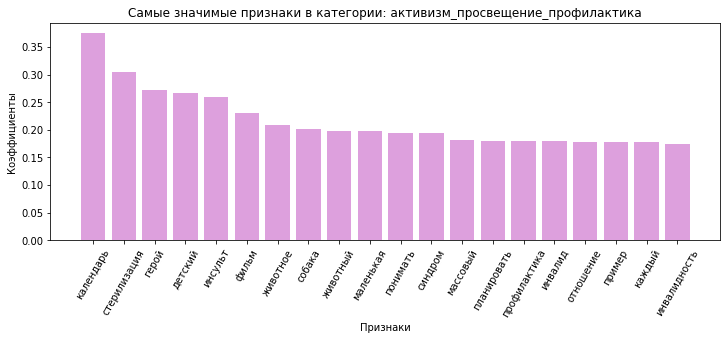

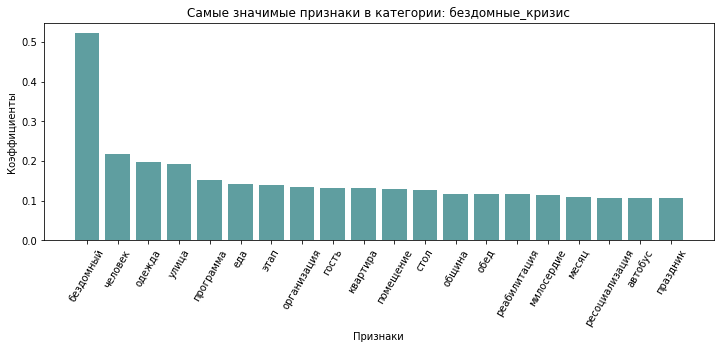

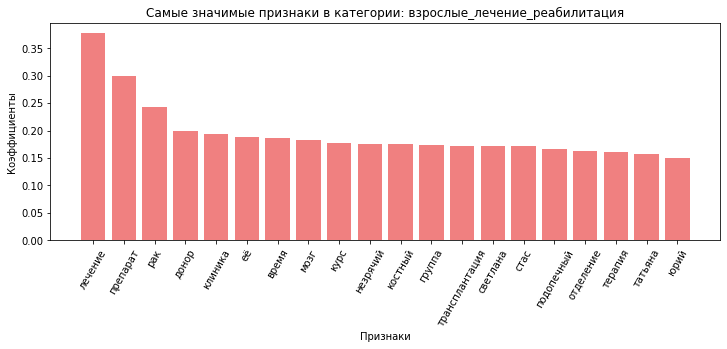

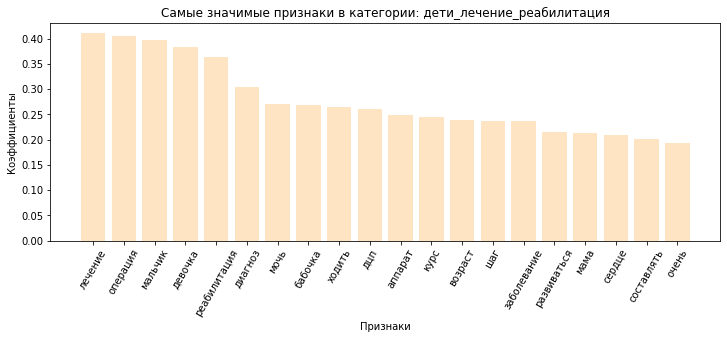

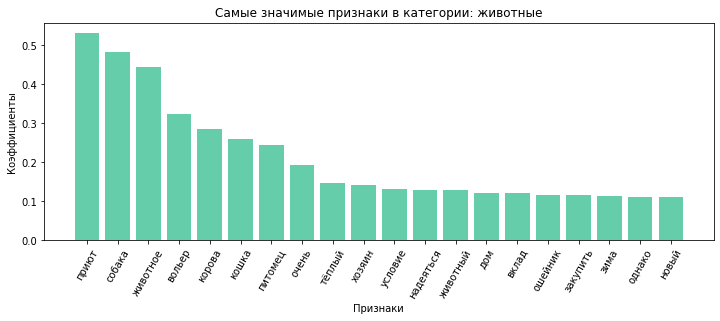

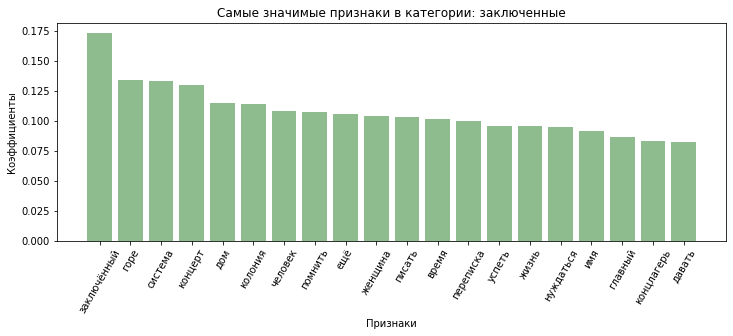

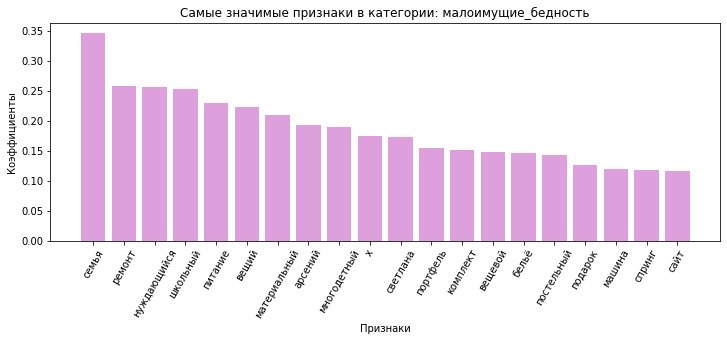

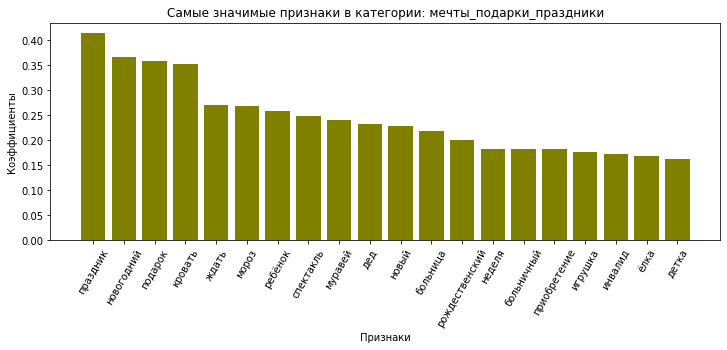

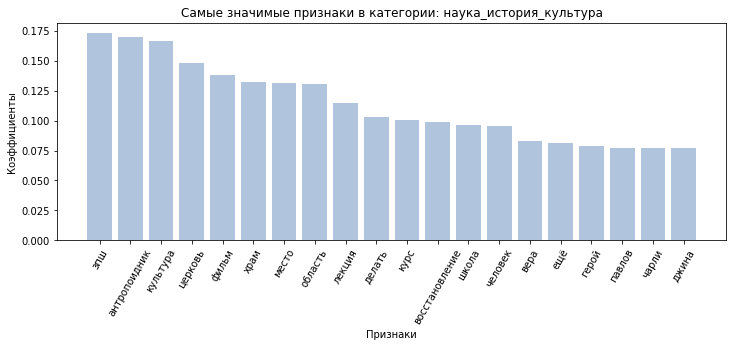

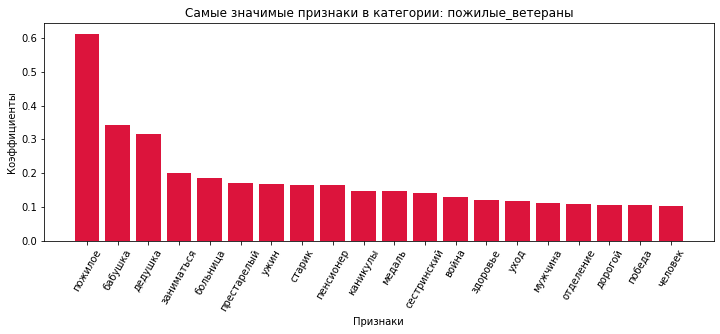

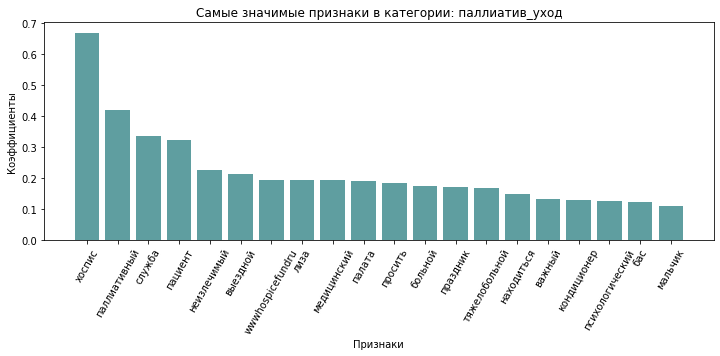

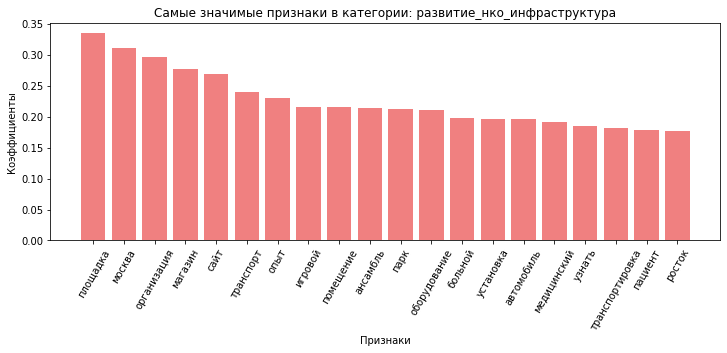

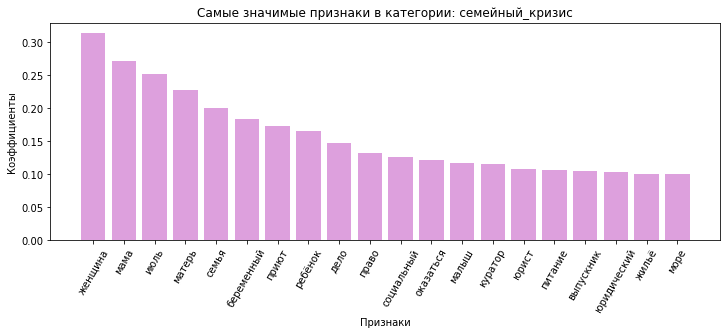

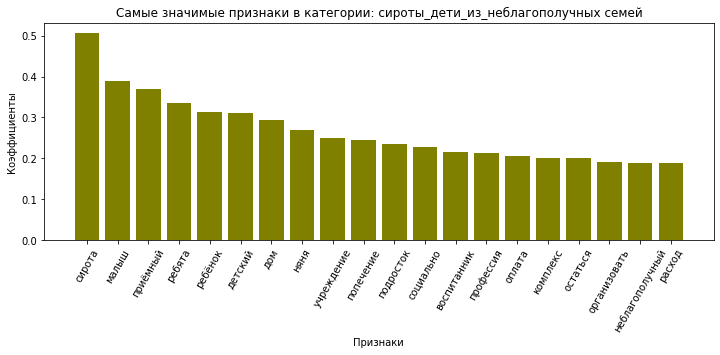

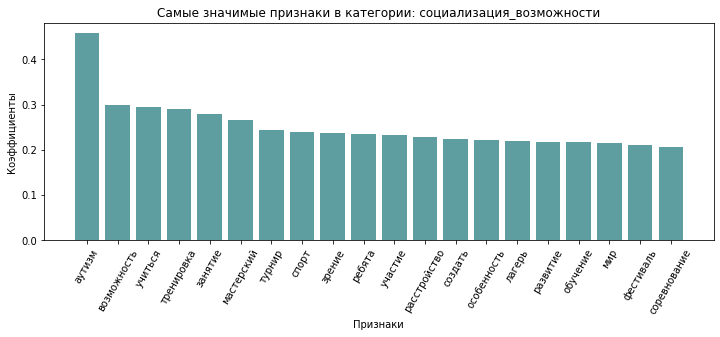

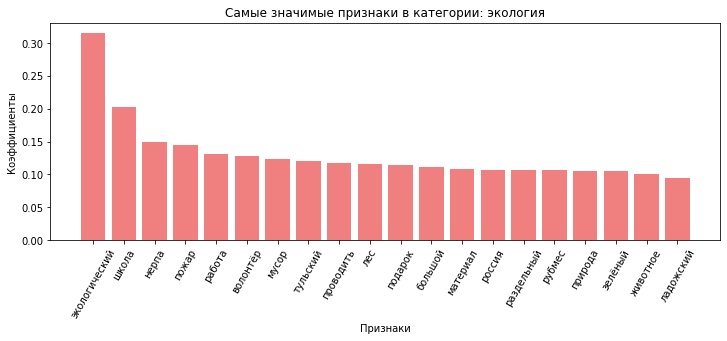

In [262]:
plot_top_features(class_label='–∞–∫—Ç–∏–≤–∏–∑–º_–ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ_–ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞', max_top_features=20, color_given="plum")
plot_top_features(class_label='–±–µ–∑–¥–æ–º–Ω—ã–µ_–∫—Ä–∏–∑–∏—Å', max_top_features=20, color_given="cadetblue")
plot_top_features(class_label='–≤–∑—Ä–æ—Å–ª—ã–µ_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è', max_top_features=20, color_given="lightcoral")
plot_top_features(class_label='–¥–µ—Ç–∏_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è', max_top_features=20, color_given="bisque")
plot_top_features(class_label='–∂–∏–≤–æ—Ç–Ω—ã–µ', max_top_features=20, color_given="mediumaquamarine")
plot_top_features(class_label='–∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ', max_top_features=20, color_given="darkseagreen")
plot_top_features(class_label='–º–∞–ª–æ–∏–º—É—â–∏–µ_–±–µ–¥–Ω–æ—Å—Ç—å', max_top_features=20, color_given="plum")
plot_top_features(class_label='–º–µ—á—Ç—ã_–ø–æ–¥–∞—Ä–∫–∏_–ø—Ä–∞–∑–¥–Ω–∏–∫–∏', max_top_features=20, color_given="olive")
plot_top_features(class_label='–Ω–∞—É–∫–∞_–∏—Å—Ç–æ—Ä–∏—è_–∫—É–ª—å—Ç—É—Ä–∞', max_top_features=20, color_given="lightsteelblue")
plot_top_features(class_label='–ø–æ–∂–∏–ª—ã–µ_–≤–µ—Ç–µ—Ä–∞–Ω—ã', max_top_features=20, color_given="crimson")
plot_top_features(class_label='–ø–∞–ª–ª–∏–∞—Ç–∏–≤_—É—Ö–æ–¥', max_top_features=20, color_given="cadetblue")
plot_top_features(class_label='—Ä–∞–∑–≤–∏—Ç–∏–µ_–Ω–∫–æ_–∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞', max_top_features=20, color_given="lightcoral")
plot_top_features(class_label='—Å–µ–º–µ–π–Ω—ã–π_–∫—Ä–∏–∑–∏—Å', max_top_features=20, color_given="plum")
plot_top_features(class_label='—Å–∏—Ä–æ—Ç—ã_–¥–µ—Ç–∏_–∏–∑_–Ω–µ–±–ª–∞–≥–æ–ø–æ–ª—É—á–Ω—ã—Ö —Å–µ–º–µ–π', max_top_features=20, color_given="olive")
plot_top_features(class_label='—Å–æ—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è_–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏', max_top_features=20, color_given="cadetblue")
plot_top_features(class_label='—ç–∫–æ–ª–æ–≥–∏—è', max_top_features=20, color_given="lightcoral")

Confusion matrix –Ω–µ –æ—á–µ–Ω—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞ –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ, —Ç.–∫. –¥–∞–Ω–Ω—ã—Ö –º–∞–ª–æ –∏ –º–Ω–æ–≥–æ –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –ï—Å–ª–∏ –≤ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É –Ω–µ –ø–æ–ø–∞–ª–∏ —ç–∫–∑. –∫–∞–∫–æ–≥–æ-—Ç–æ –∫–ª–∞—Å—Å–∞, —Ç–æ —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞ —Ç—É—Ç –Ω–µ –±—É–¥–µ—Ç.

In [232]:
confusion_matrix(y_test, clf.predict(X_test)) 

array([[  5,   0,   0,   3,   2,   0,   0,   1,   0,   0,   1,   1,   1,
          3,   4,   0],
       [  0,   6,   0,   0,   0,   0,   2,   0,   0,   0,   0,   1,   0,
          0,   0,   0],
       [  1,   0,   6,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   4,   0],
       [  0,   0,   2, 118,   0,   0,   0,   1,   0,   1,   0,   2,   0,
          3,   7,   0],
       [  0,   0,   0,   0,  61,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   6,   2,   0,   0,   1,   1,   1,
          4,   2,   0],
       [  0,   0,   0,   4,   0,   0,   0,  18,   0,   1,   0,   0,   0,
          0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   1,   0],
       [  0,   0,   0,   4,   0,   0,   0,   0,   0,   9,   0,   0,   0,
          0,   1,   0],
       [  0,   0,   0,   0,   

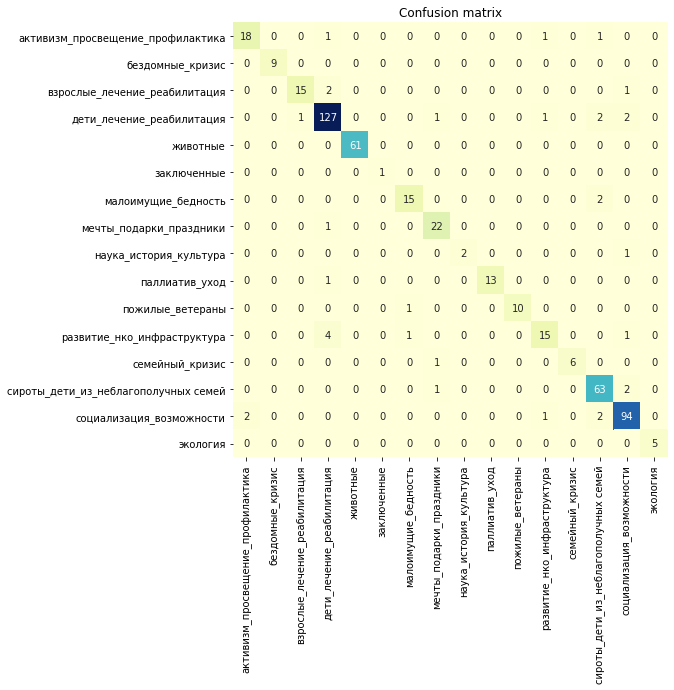

'–í–∞–∂–Ω–æ! –û—Å—Ç–æ—Ä–æ–∂–Ω–µ–µ —Å –ø—Ä–∏—Å–≤–æ–µ–Ω–∏–µ–º —Å–≤–æ–∏—Ö –Ω–∞–∑–≤–∞–Ω–∏–π ticklelabels: –≥—Ä–∞—Ñ–∏–∫ —Å—Ç—Ä–æ–∏—Ç—Å—è –ø–æ "–æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–º" –¥–∞–Ω–Ω—ã–º –º–æ–¥–µ–ª–∏, –∞ –ø–æ–¥–ø–∏—Å–∏ –∑–∞–¥–∞—é—Ç—Å—è "–∏—Å–∫—É—Å—Ç–≤–µ–Ω–Ω–æ" —Ä—É–∫–∞–º–∏, –ø–æ—ç—Ç–æ–º—É –µ—Å–ª–∏ –≤ —Ç–µ—Å—Ç–µ –Ω–µ –æ–∫–∞–∑–∞–ª–æ—Å—å –∫–∞–∫–æ–≥–æ-—Ç–æ –∫–ª–∞—Å—Å–∞, —Ç–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Å—ä–µ–¥–µ—Ç. –ü–æ —Ç–µ–º –∂–µ –ø—Ä–∏—á–∏–Ω–∞–º –≤–∞–∂–µ–Ω –ø–æ—Ä—è–¥–æ–∫ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ —Å–ø–∏–∫–µ –Ω–∞–∑–≤–∞–Ω–∏–π.'

In [367]:
#%matplotlib inline #–≤—à–∏–≤–∞–µ—Ç –≥—Ä–∞—Ñ–∏–∫ –≤ —è—á–µ–π–∫—É —Å –∫–æ–¥–æ–º
categories = ['–∞–∫—Ç–∏–≤–∏–∑–º_–ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ_–ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞', '–±–µ–∑–¥–æ–º–Ω—ã–µ_–∫—Ä–∏–∑–∏—Å','–≤–∑—Ä–æ—Å–ª—ã–µ_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è',
              '–¥–µ—Ç–∏_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è', '–∂–∏–≤–æ—Ç–Ω—ã–µ', '–∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ', '–º–∞–ª–æ–∏–º—É—â–∏–µ_–±–µ–¥–Ω–æ—Å—Ç—å', 
              '–º–µ—á—Ç—ã_–ø–æ–¥–∞—Ä–∫–∏_–ø—Ä–∞–∑–¥–Ω–∏–∫–∏', '–Ω–∞—É–∫–∞_–∏—Å—Ç–æ—Ä–∏—è_–∫—É–ª—å—Ç—É—Ä–∞', '–ø–∞–ª–ª–∏–∞—Ç–∏–≤_—É—Ö–æ–¥', '–ø–æ–∂–∏–ª—ã–µ_–≤–µ—Ç–µ—Ä–∞–Ω—ã',
              '—Ä–∞–∑–≤–∏—Ç–∏–µ_–Ω–∫–æ_–∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞', '—Å–µ–º–µ–π–Ω—ã–π_–∫—Ä–∏–∑–∏—Å', '—Å–∏—Ä–æ—Ç—ã_–¥–µ—Ç–∏_–∏–∑_–Ω–µ–±–ª–∞–≥–æ–ø–æ–ª—É—á–Ω—ã—Ö —Å–µ–º–µ–π',
              '—Å–æ—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è_–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏', '—ç–∫–æ–ª–æ–≥–∏—è']
plt.figure(figsize=(8,8)) # –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –ø–µ—Ä–µ–¥ sns.heatmap
sns.heatmap(data=confusion_matrix(y_test, lr.predict(X_test)), annot=True, fmt='d', cbar=False, xticklabels=categories, yticklabels=categories, cmap="YlGnBu", square=True)
# fmt = String formatting code to use when adding annotations
plt.title("Confusion matrix")
plt.show()

"""–í–∞–∂–Ω–æ! –û—Å—Ç–æ—Ä–æ–∂–Ω–µ–µ —Å –ø—Ä–∏—Å–≤–æ–µ–Ω–∏–µ–º —Å–≤–æ–∏—Ö –Ω–∞–∑–≤–∞–Ω–∏–π ticklelabels: –≥—Ä–∞—Ñ–∏–∫ —Å—Ç—Ä–æ–∏—Ç—Å—è –ø–æ "–æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–º" –¥–∞–Ω–Ω—ã–º –º–æ–¥–µ–ª–∏, –∞ –ø–æ–¥–ø–∏—Å–∏ –∑–∞–¥–∞—é—Ç—Å—è "–∏—Å–∫—É—Å—Ç–≤–µ–Ω–Ω–æ" —Ä—É–∫–∞–º–∏, –ø–æ—ç—Ç–æ–º—É –µ—Å–ª–∏ –≤ —Ç–µ—Å—Ç–µ –Ω–µ –æ–∫–∞–∑–∞–ª–æ—Å—å –∫–∞–∫–æ–≥–æ-—Ç–æ –∫–ª–∞—Å—Å–∞, —Ç–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Å—ä–µ–¥–µ—Ç. –ü–æ —Ç–µ–º –∂–µ –ø—Ä–∏—á–∏–Ω–∞–º –≤–∞–∂–µ–Ω –ø–æ—Ä—è–¥–æ–∫ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ —Å–ø–∏–∫–µ –Ω–∞–∑–≤–∞–Ω–∏–π."""

ROC –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è 16 –∫–ª–∞—Å—Å–æ–≤ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –ø–µ—Ä–µ–≥—Ä—É–∂–µ–Ω–Ω—ã–π, –Ω–æ –≤ —Ü–µ–ª–æ–º –¥–∞–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ, —á—Ç–æ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏ —Å–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å –º–æ–∂–µ–ª–∏ –æ—á–µ–Ω—å —Ä–∞–∑–Ω–∞—è –∫ —Ä–∞–∑–Ω—ã–º –∫–ª–∞—Å—Å–∞–º. –î–ª—è –µ–≥–æ —Å–æ–∑–¥–∞–Ω–∏—è –Ω—É–∂–Ω–æ –∞–¥–∞–ø—Ç–∏—Ä–æ–≤–∞—Ç—å –æ–±—É—á–µ–Ω–∏ –ø–æ–¥ –ø—Ä–∏–Ω—Ü–∏–ø one-vs-rest (–ø–æ–¥–æ–±–∏–µ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, —Ç.–∫. ROC —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–æ–ª—å–∫–æ –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π).

In [335]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


X = df.Description
y = df.Category

# Binarize the output
y = label_binarize(y, classes=['–∞–∫—Ç–∏–≤–∏–∑–º_–ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ_–ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞', '–±–µ–∑–¥–æ–º–Ω—ã–µ_–∫—Ä–∏–∑–∏—Å','–≤–∑—Ä–æ—Å–ª—ã–µ_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è',
              '–¥–µ—Ç–∏_–ª–µ—á–µ–Ω–∏–µ_—Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è', '–∂–∏–≤–æ—Ç–Ω—ã–µ', '–∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ', '–º–∞–ª–æ–∏–º—É—â–∏–µ_–±–µ–¥–Ω–æ—Å—Ç—å', 
              '–º–µ—á—Ç—ã_–ø–æ–¥–∞—Ä–∫–∏_–ø—Ä–∞–∑–¥–Ω–∏–∫–∏', '–Ω–∞—É–∫–∞_–∏—Å—Ç–æ—Ä–∏—è_–∫—É–ª—å—Ç—É—Ä–∞', '–ø–∞–ª–ª–∏–∞—Ç–∏–≤_—É—Ö–æ–¥', '–ø–æ–∂–∏–ª—ã–µ_–≤–µ—Ç–µ—Ä–∞–Ω—ã',
              '—Ä–∞–∑–≤–∏—Ç–∏–µ_–Ω–∫–æ_–∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞', '—Å–µ–º–µ–π–Ω—ã–π_–∫—Ä–∏–∑–∏—Å', '—Å–∏—Ä–æ—Ç—ã_–¥–µ—Ç–∏_–∏–∑_–Ω–µ–±–ª–∞–≥–æ–ø–æ–ª—É—á–Ω—ã—Ö —Å–µ–º–µ–π',
              '—Å–æ—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è_–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏', '—ç–∫–æ–ª–æ–≥–∏—è'])

n_classes = y.shape[1]

Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, y, stratify = df.Category)

count = CountVectorizer()
ovr_lr = LogisticRegression(max_iter=1000)

Xx_train = count.fit_transform(Xx_train)

classifier = OneVsRestClassifier(lg_clf)
yy_score = classifier.fit(Xx_train, yy_train).decision_function(count.transform(Xx_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yy_test[:, i], yy_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yy_test.ravel(), yy_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

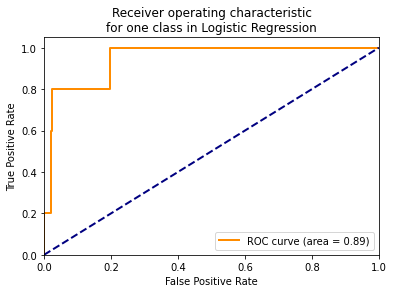

In [337]:
from itertools import cycle


plt.figure()
lw = 2
plt.plot(fpr[15], tpr[15], color='darkorange', # —É–∫–∞–∑. –∏–Ω–¥–µ–∫—Å –∫–ª–∞—Å—Å–∞, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ —Å—Ç—Ä–æ–∏–º
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic\nfor one class in Logistic Regression')
plt.legend(loc="lower right")
plt.show()

<ipython-input-340-9d9d51e8394c>:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


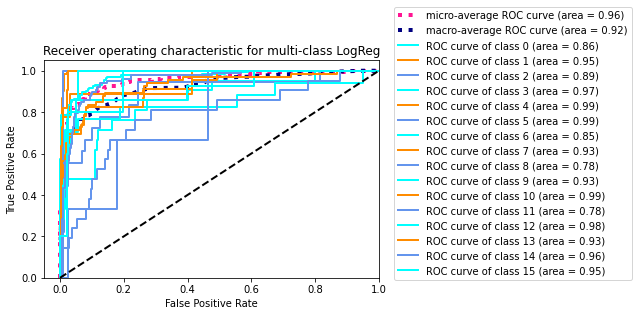

In [340]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class LogReg')
plt.legend(loc=9, bbox_to_anchor=(1.4,1.27))
#plt.legend(loc="lower right")
plt.show()

## –ü–æ–¥–≤–∞–ª: –ü–æ–ø—ã—Ç–∫–∏ —Å –¥—Ä—É–≥–∏–º–∏ –º–æ–¥–µ–ª—è–º–∏ –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [26]:
nb = MultinomialNB()
clf_1 = nb.fit(X_train, y_train)

In [27]:
print(classification_report(y_test, clf_1.predict(X_test)))

                                        precision    recall  f1-score   support

     –∞–∫—Ç–∏–≤–∏–∑–º –ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ –ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞       0.00      0.00      0.00        21
                    –±–µ–∑–¥–æ–º–Ω—ã–µ –∏ –∫—Ä–∏–∑–∏—Å       0.00      0.00      0.00        11
       –≤–∑—Ä–æ—Å–ª—ã–µ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.00      0.00      0.00        14
           –¥–µ—Ç–∏ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.73      0.83      0.77       153
                              –∂–∏–≤–æ—Ç–Ω—ã–µ       0.76      1.00      0.87        52
                   –º–∞–ª–æ–∏–º—É—â–∏–µ –±–µ–¥–Ω–æ—Å—Ç—å       0.00      0.00      0.00        12
            –º–µ—á—Ç—ã, –ø–æ–¥–∞—Ä–∫–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–∏       1.00      0.14      0.25        28
                –Ω–∞—É–∫–∞ –∏—Å—Ç–æ—Ä–∏—è –∫—É–ª—å—Ç—É—Ä–∞       0.00      0.00      0.00         3
                      –ø–∞–ª–ª–∏–∞—Ç–∏–≤ –∏ —É—Ö–æ–¥       1.00      0.07      0.13        14
                  

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
sv = SVC()
clf_2 = sv.fit(X_train, y_train)

In [59]:
print(classification_report(y_test, clf_2.predict(X_test)))

                                        precision    recall  f1-score   support

     –∞–∫—Ç–∏–≤–∏–∑–º –ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ –ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞       0.00      0.00      0.00        20
                    –±–µ–∑–¥–æ–º–Ω—ã–µ –∏ –∫—Ä–∏–∑–∏—Å       0.00      0.00      0.00         6
       –≤–∑—Ä–æ—Å–ª—ã–µ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.00      0.00      0.00        23
           –¥–µ—Ç–∏ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.65      0.88      0.75       146
                              –∂–∏–≤–æ—Ç–Ω—ã–µ       0.93      0.88      0.90        64
                           –∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ       0.00      0.00      0.00         2
                   –º–∞–ª–æ–∏–º—É—â–∏–µ –±–µ–¥–Ω–æ—Å—Ç—å       0.00      0.00      0.00        13
            –º–µ—á—Ç—ã, –ø–æ–¥–∞—Ä–∫–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–∏       1.00      0.16      0.28        25
                –Ω–∞—É–∫–∞ –∏—Å—Ç–æ—Ä–∏—è –∫—É–ª—å—Ç—É—Ä–∞       0.00      0.00      0.00         3
                     

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
dt = DecisionTreeClassifier()
clf_3 = dt.fit(X_train, y_train)

In [61]:
print(classification_report(y_test, clf_3.predict(X_test)))

                                        precision    recall  f1-score   support

     –∞–∫—Ç–∏–≤–∏–∑–º –ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ –ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞       0.06      0.05      0.05        20
                    –±–µ–∑–¥–æ–º–Ω—ã–µ –∏ –∫—Ä–∏–∑–∏—Å       0.25      0.50      0.33         6
       –≤–∑—Ä–æ—Å–ª—ã–µ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.22      0.17      0.20        23
           –¥–µ—Ç–∏ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.67      0.66      0.66       146
                              –∂–∏–≤–æ—Ç–Ω—ã–µ       0.87      0.81      0.84        64
                           –∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ       0.00      0.00      0.00         2
                   –º–∞–ª–æ–∏–º—É—â–∏–µ –±–µ–¥–Ω–æ—Å—Ç—å       0.08      0.15      0.10        13
            –º–µ—á—Ç—ã, –ø–æ–¥–∞—Ä–∫–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–∏       0.35      0.24      0.29        25
                –Ω–∞—É–∫–∞ –∏—Å—Ç–æ—Ä–∏—è –∫—É–ª—å—Ç—É—Ä–∞       0.00      0.00      0.00         3
                     

In [62]:
rf = RandomForestClassifier()
clf_4 = rf.fit(X_train, y_train)

In [63]:
print(classification_report(y_test, clf_4.predict(X_test)))

                                        precision    recall  f1-score   support

     –∞–∫—Ç–∏–≤–∏–∑–º –ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ –ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞       0.00      0.00      0.00        20
                    –±–µ–∑–¥–æ–º–Ω—ã–µ –∏ –∫—Ä–∏–∑–∏—Å       1.00      0.17      0.29         6
       –≤–∑—Ä–æ—Å–ª—ã–µ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       1.00      0.09      0.16        23
           –¥–µ—Ç–∏ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.63      0.92      0.75       146
                              –∂–∏–≤–æ—Ç–Ω—ã–µ       0.93      0.98      0.95        64
                           –∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ       0.00      0.00      0.00         2
                   –º–∞–ª–æ–∏–º—É—â–∏–µ –±–µ–¥–Ω–æ—Å—Ç—å       0.50      0.08      0.13        13
            –º–µ—á—Ç—ã, –ø–æ–¥–∞—Ä–∫–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–∏       1.00      0.28      0.44        25
                –Ω–∞—É–∫–∞ –∏—Å—Ç–æ—Ä–∏—è –∫—É–ª—å—Ç—É—Ä–∞       0.00      0.00      0.00         3
                     

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
kn = KNeighborsClassifier()
clf_5 = kn.fit(X_train, y_train)

In [65]:
print(classification_report(y_test, clf_5.predict(X_test)))

                                        precision    recall  f1-score   support

     –∞–∫—Ç–∏–≤–∏–∑–º –ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ –ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞       0.14      0.15      0.15        20
                    –±–µ–∑–¥–æ–º–Ω—ã–µ –∏ –∫—Ä–∏–∑–∏—Å       0.33      0.50      0.40         6
       –≤–∑—Ä–æ—Å–ª—ã–µ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.36      0.22      0.27        23
           –¥–µ—Ç–∏ –ª–µ—á–µ–Ω–∏–µ –∏ —Ä–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è       0.62      0.82      0.71       146
                              –∂–∏–≤–æ—Ç–Ω—ã–µ       0.62      0.86      0.72        64
                           –∑–∞–∫–ª—é—á–µ–Ω–Ω—ã–µ       0.00      0.00      0.00         2
                   –º–∞–ª–æ–∏–º—É—â–∏–µ –±–µ–¥–Ω–æ—Å—Ç—å       0.11      0.23      0.15        13
            –º–µ—á—Ç—ã, –ø–æ–¥–∞—Ä–∫–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–∏       0.20      0.12      0.15        25
                –Ω–∞—É–∫–∞ –∏—Å—Ç–æ—Ä–∏—è –∫—É–ª—å—Ç—É—Ä–∞       0.00      0.00      0.00         3
                     

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
#GridSearch –¥–ª—è –ª–æ–≥. —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ 1—á.20 –º–∏–Ω.

grid_values = {'penalty': ['l1', 'l2', 'elastinet', 'none'],
               'C':[0.001,.009,0.01,.09,1,5,10,25], 
               'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
               'class_weight': ['balanced', 'none']}
gs_lr = GridSearchCV(lr, param_grid = grid_values)
gs_clf = gs_lr.fit(X_train, y_train)
print(gs_clf.best_params_) 

#–≤–æ—Ç —á—Ç–æ –∏–∑ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω–æ–≥–æ GS —Å—á–µ–ª –ª—É—á—à–∏–º:
#{'C': 0.09, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'sag'}

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, go